# Topic Analysis Using LDA (Latent Dirichlet Allocation)

In [1]:
# Import pandas for data frame
import pandas as pd

In [2]:
# Read in cleaned .csv file
simpsons_script = pd.read_csv("simpsons_df_fixed.csv")['raw_text']
simpsons_script.head()

0                                    ooo careful homer
1                         theres no time to be careful
2                                            were late
3               hushed voice sorry excuse us pardon me
4     simultaneously hey norman hows it going so yo...
Name: raw_text, dtype: object

In [3]:
# Import gensim for topic modelling, including pre-process function
import gensim
from gensim.utils import simple_preprocess

In [4]:
# Import NLTK for lemmatizer and stemmer
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/AthenaXiourouppa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Import NLTK stop word list
from nltk.corpus import stopwords

In [6]:
# Assign stop word list
stop_words = set(stopwords.words('english'))

In [7]:
# Create function for lemmatising and stemming
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos = 'v'))

In [9]:
# Preprocessing function for tokenizing, lemmatising, and stemming
# Define stemmer
stemmer = SnowballStemmer('english')

def preprocess(text):
    # Initialise array
    result = []
    # Tokenize and add to array
    for token in gensim.utils.simple_preprocess(text):
        if token in stop_words:
            continue
        else:   
            result.append(lemmatize_stemming(token))
    return result

In [10]:
# Implement preprocessing function on script
stem_lem_script = simpsons_script.map(preprocess)

In [11]:
# Create dictionary of unique words
dictionary = gensim.corpora.Dictionary(stem_lem_script)

In [12]:
# Initialise counter
count = 0

# Count frequencies of stemmed words
for k, v in dictionary.iteritems():
    print(k,v)
    count += 1
    if count > 10:
        break

0 care
1 homer
2 ooo
3 there
4 time
5 late
6 excus
7 hush
8 pardon
9 sorri
10 us


In [13]:
# Create bag of words
bow_corpus = [dictionary.doc2bow(doc) for doc in stem_lem_script]

In [14]:
# Create LDA model using bag of words for 3 topics (to start)
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 3, 
                                      id2word = dictionary, passes = 2,
                                      workers = 2)

In [15]:
# Explore topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx,topic))

Topic: 0 
Words: 0.022*"oh" + 0.016*"know" + 0.016*"get" + 0.013*"one" + 0.012*"dont" + 0.009*"well" + 0.009*"yeah" + 0.009*"okay" + 0.008*"uh" + 0.007*"like"
Topic: 1 
Words: 0.021*"im" + 0.018*"go" + 0.014*"that" + 0.013*"get" + 0.011*"hey" + 0.010*"bart" + 0.009*"homer" + 0.009*"your" + 0.008*"back" + 0.007*"gonna"
Topic: 2 
Words: 0.013*"like" + 0.013*"think" + 0.010*"dont" + 0.009*"dad" + 0.009*"look" + 0.008*"get" + 0.008*"im" + 0.008*"make" + 0.008*"realli" + 0.007*"say"


In [16]:
# Display results in html file
import pyLDAvis.gensim_models

lda_display = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dictionary, sort_topics = False)
pyLDAvis.save_html(lda_display, "top_3_topics.html")

/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps
/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [17]:
# Compute coherence values function (for assessing optimal topic number)
def compute_coherence_values(dictionary, corpus, 
                             texts, limit, start = 2,
                            step = 3):
    # Initialise array
    coherence_values = []
    model_list = []
    
    # Loop over possible topic numbers
    for num_topics in range(start, limit, step):
        # Create model
        model = gensim.models.LdaMulticore(bow_corpus, num_topics = num_topics, 
                                      id2word = dictionary, passes = 2,
                                      workers = 2)
        # Append model to list
        model_list.append(model)
        
        # Create coherence model
        coherence_model = CoherenceModel(model = model, texts = texts, 
                                        dictionary = dictionary, coherence = 'c_v')
        
        # Append to list
        coherence_values.append(coherence_model.get_coherence())
        
    return coherence_values, model_list

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
# Calculate coherence values for various models of topic size 2-100
from gensim.models import CoherenceModel

coherence_values, model_list = compute_coherence_values(dictionary = dictionary,
                                                       corpus = bow_corpus,
                                                       texts = stem_lem_script,
                                                       start = 2,
                                                       limit = 100,
                                                       step = 5)

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Import matplotlib for displaying results
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


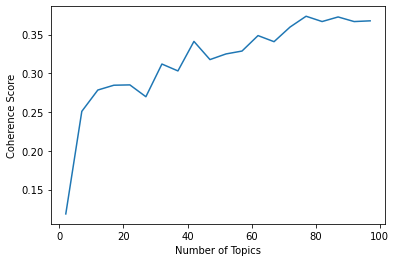

In [20]:
# Plot coherence value against number of topics
plt.plot(range(2,100,5), coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

plt.savefig('coherence.png', dpi=300)
plt.show()

In [21]:
# Display topics for optimal value of topics (75)
import pyLDAvis.gensim_models

lda_display = pyLDAvis.gensim_models.prepare(model_list[18], bow_corpus, dictionary, sort_topics = False)
pyLDAvis.save_html(lda_display, "top_75_topics.html")

/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
